In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('/home/arghanath/Documents/Machine Learning/Resources Folder/ML/13_kmeans/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


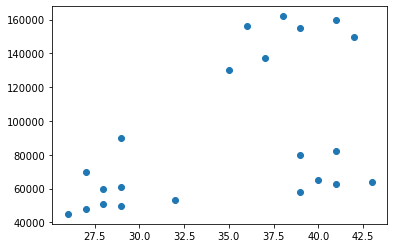

In [3]:
plt.scatter(df['Age'], df['Income($)'])

In [4]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [6]:
y_predicted= km.fit_predict(df.drop(['Name'], axis='columns'))
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [7]:
df['Clusters']= y_predicted
df.head()

,Name,Age,Income($),Clusters
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


No handles with labels found to put in legend.


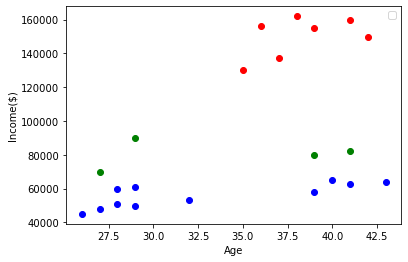

In [14]:
df0=df[df.Clusters==0]
df1=df[df.Clusters==1]
df2=df[df.Clusters==2]


plt.scatter(df0['Age'], df0['Income($)'], color='green')
plt.scatter(df1['Age'], df1['Income($)'], color='red')
plt.scatter(df2['Age'], df2['Income($)'], color='blue')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [30]:
scalar= MinMaxScaler()
scalar.fit(df[['Income($)']])
df['Income($)']= scalar.transform(df[['Income($)']])


scalar.fit(df[['Age']])
df.Age=scalar.transform(df[['Age']])
df.head()

,Name,Age,Income($),Clusters
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


No handles with labels found to put in legend.


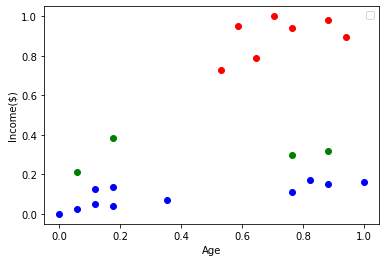

In [31]:
df0=df[df.Clusters==0]
df1=df[df.Clusters==1]
df2=df[df.Clusters==2]


plt.scatter(df0['Age'], df0['Income($)'], color='green')
plt.scatter(df1['Age'], df1['Income($)'], color='red')
plt.scatter(df2['Age'], df2['Income($)'], color='blue')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [45]:
kmNew=KMeans(n_clusters=3)
y_predicted=kmNew.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [46]:
df['Clusters']=y_predicted

In [48]:
df

,Name,Age,Income($),Clusters
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


No handles with labels found to put in legend.


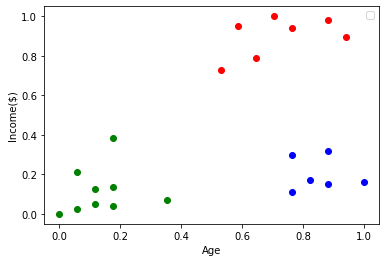

In [50]:
df0=df[df.Clusters==0]
df1=df[df.Clusters==1]
df2=df[df.Clusters==2]


plt.scatter(df0['Age'], df0['Income($)'], color='green')
plt.scatter(df1['Age'], df1['Income($)'], color='red')
plt.scatter(df2['Age'], df2['Income($)'], color='blue')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [54]:
kmNew.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

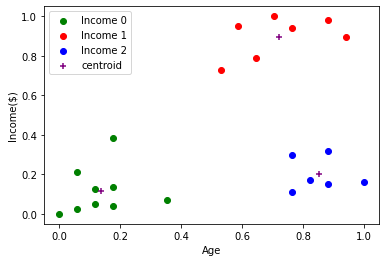

In [56]:
df0=df[df.Clusters==0]
df1=df[df.Clusters==1]
df2=df[df.Clusters==2]


plt.scatter(df0['Age'], df0['Income($)'], color='green', label='Income 0')
plt.scatter(df1['Age'], df1['Income($)'], color='red', label='Income 1')
plt.scatter(df2['Age'], df2['Income($)'], color='blue', label='Income 2')

plt.scatter(kmNew.cluster_centers_[:,0], kmNew.cluster_centers_[:,1], color='purple', marker='+', label='centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [59]:
k_rng= range(1,10)
sse=[]
for k in k_rng:
    kms=KMeans(n_clusters=k)
    kms.fit(df[['Age','Income($)']])
    sse.append(kms.inertia_)

In [60]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.3491047094419565,
 0.2664030124668415,
 0.22020960864009395,
 0.17840674931327927,
 0.1458071934604629,
 0.10188787724979426]

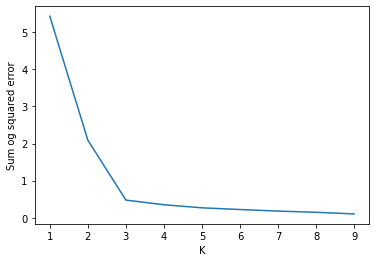

In [61]:
plt.xlabel('K')
plt.ylabel('Sum og squared error')
plt.plot(k_rng, sse)